In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits=load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [48]:
digits.data.sum()

561718.0

In [5]:
digits.data[0]  #the data of the 8*8 dimensional of zero index will be displayed

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

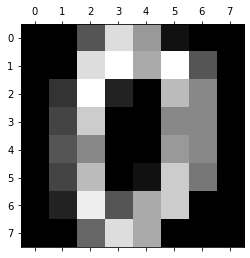

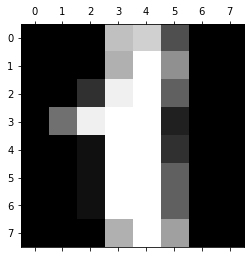

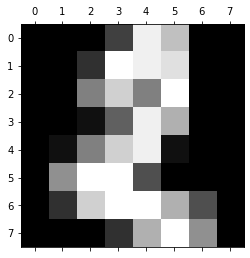

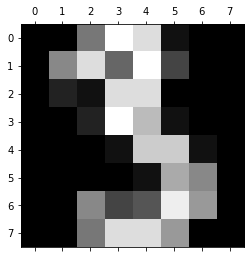

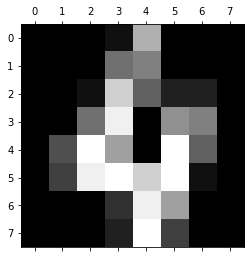

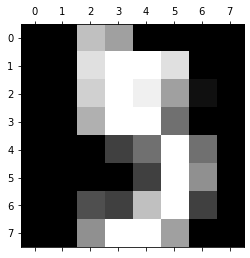

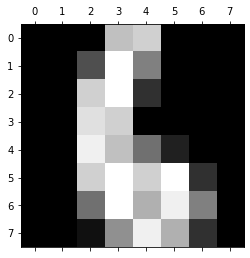

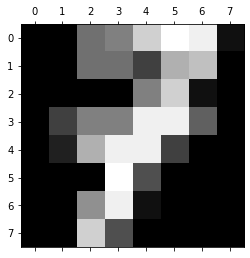

In [6]:
#to see the image of the 0th index of above data we use matplotlib
plt.gray()
for i in range(8):
    plt.matshow(digits.images[i]) #used to show the image 

    


In [7]:
digits.target[0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [44]:
digits.target.sum()

8070

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test=train_test_split(digits.data,digits.target,test_size=0.2,random_state=0)

In [10]:
len(X_train)

1437

In [11]:
len(X_test)

360

In [23]:
from sklearn.svm import SVC

In [35]:
sai=SVC(gamma=0.001, C=100)

In [36]:
sai.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [37]:
sai.score(X_test,y_test)

0.9916666666666667

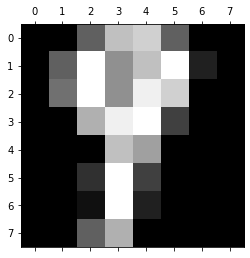

In [38]:
plt.matshow(digits.images[69])

In [39]:
digits.data[69]

array([ 0.,  0.,  6., 12., 13.,  6.,  0.,  0.,  0.,  6., 16.,  9., 12.,
       16.,  2.,  0.,  0.,  7., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,
       11., 15., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,
        0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        2.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.])

In [40]:
digits.target[69]

9

In [41]:
sai.predict([digits.data[69]]) #we use data instead of images because images are binary

array([9])

In [42]:
sai.predict(digits.data[0:9])

array([0, 1, 2, 3, 4, 9, 6, 7, 8])

In [43]:
#our score is 96 but how to know where our data failing to predict to do this we use confusion matrix
y_predict=sai.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

Text(69.0, 0.5, 'Truth')

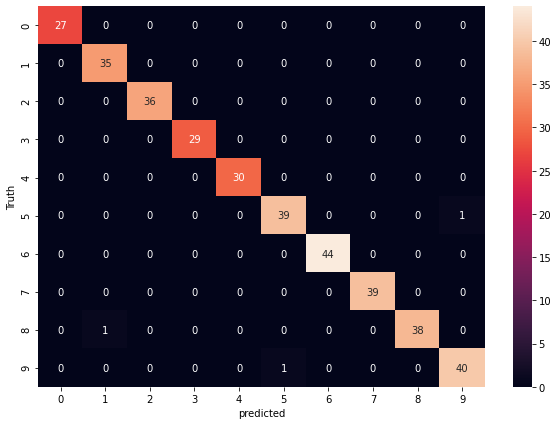

In [33]:
import seaborn as sn #to visualizee the confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")